## Análise Exploratória dos Dados

In [133]:
import pandas as pd

In [134]:
import os 
path = os.path.join('salary.csv')

df = pd.read_csv(path)
df

,Country,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,ManageStaff,DatabaseServers,PopulationOfLargestCityWithin20Miles,Gender,SalaryUSD
0,United States,Microsoft SQL Server,15,Full time employee,No,500,20K-99K (large town),Male,115000.0
1,United States,Other,6,Full time employee,No,1,1M+ (metropolis),Male,100000.0
2,Spain,Microsoft SQL Server,2,Full time employee,Yes,1,1M+ (metropolis),Male,100000.0
3,United States,Microsoft SQL Server,3,Full time employee,No,3,1M+ (metropolis),Male,70000.0
4,United States,Oracle,30,Full time employee,No,45,100K-299K (city),Male,110000.0
...,...,...,...,...,...,...,...,...,...
8622,France,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,No,30,Not Asked,Not Asked,35000.0
8623,United Kingdom,Microsoft SQL Server,6,Full time employee,No,500,Not Asked,Not Asked,56000.0
8624,Germany,Microsoft SQL Server,5,Full time employee,Yes,100,Not Asked,Not Asked,95000.0
8625,United Kingdom,Microsoft SQL Server,15,Full time employee,No,40,Not Asked,Not Asked,61515.0


In [135]:
df.isnull().sum()

Country                                 0
PrimaryDatabase                         0
YearsWithThisDatabase                   0
EmploymentStatus                        0
ManageStaff                             0
DatabaseServers                         0
PopulationOfLargestCityWithin20Miles    0
Gender                                  0
SalaryUSD                               0
dtype: int64

In [136]:
df.value_counts()

Country        PrimaryDatabase       YearsWithThisDatabase  EmploymentStatus    ManageStaff  DatabaseServers  PopulationOfLargestCityWithin20Miles  Gender     SalaryUSD
United States  Microsoft SQL Server  20                     Full time employee  No           4                Not Asked                             Female     120000.0     5
                                     1                      Full time employee  No           2                Not Asked                             Not Asked  65000.0      3
                                     2                      Full time employee  No           3                1M+ (metropolis)                      Male       92500.0      3
                                     1                      Full time employee  No           3                300K-1M (large city)                  Male       60000.0      3
                                     10                     Full time employee  No           5                Not Asked                

In [137]:
# Describe é interessante para identificar como estão dispostos os dados numéricos, o intervalo normal deles e já para identificar possíveis outliers.

In [138]:
df.describe()

,YearsWithThisDatabase,DatabaseServers,SalaryUSD
count,8627.000000,8627.000000,8.627000e+03
mean,20.689347,372.185348,9.394615e+04
std,664.084376,12196.490390,5.998446e+04
min,0.000000,0.000000,0.000000e+00
25%,5.000000,6.000000,6.500000e+04
50%,10.000000,20.000000,9.000000e+04
75%,15.000000,70.000000,1.150000e+05
max,53716.000000,1000000.000000,1.850000e+06


In [139]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of              Country       PrimaryDatabase  YearsWithThisDatabase  \
0      United States  Microsoft SQL Server                     15   
1      United States                 Other                      6   
2              Spain  Microsoft SQL Server                      2   
3      United States  Microsoft SQL Server                      3   
4      United States                Oracle                     30   
...              ...                   ...                    ...   
8622          France  Microsoft SQL Server                     10   
8623  United Kingdom  Microsoft SQL Server                      6   
8624         Germany  Microsoft SQL Server                      5   
8625  United Kingdom  Microsoft SQL Server                     15   
8626   United States  Microsoft SQL Server                     10   

                                       EmploymentStatus ManageStaff  \
0                                    Full time employee  

#### Trabalhando em cima de variáveis numéricas: 

Obs: temos muitos outliers que aparentam ser erros de digitação, como por exemplo: YearsWithThisDatabase -> 53716.000000 que representaria 53716 anos, o que é impossível.

Para casos como esse, optamos por remover da base de dados.

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_types = ['int64', 'float64']


In [141]:
# Consideramos valores maiores que 40 anos para essa variável como sendo erro de digitação e optamos por filtrar.
df = df[df['YearsWithThisDatabase'] <= 40]
df.describe()


,YearsWithThisDatabase,DatabaseServers,SalaryUSD
count,8624.000000,8624.000000,8.624000e+03
mean,10.829082,372.243506,9.395388e+04
std,6.244525,12198.610315,5.998991e+04
min,0.000000,0.000000,0.000000e+00
25%,5.000000,6.000000,6.500000e+04
50%,10.000000,20.000000,9.000000e+04
75%,15.000000,70.000000,1.150000e+05
max,40.000000,1000000.000000,1.850000e+06


In [142]:
# Para esse caso, tinhamos muitos outliers que não estavam de acordo com o que entendemos como válido
#  (Muitos servidores para somente uma pessoa tomar conta, acreditamos que a maioria desses casos eram erros de digitação mesmo), optando por remover esses casos.

limit_superior  = df['DatabaseServers'].quantile(0.95)
limit_inferior = df['DatabaseServers'].quantile(0.01)
df = df[
    (df['DatabaseServers'] <= limit_superior) & (df['DatabaseServers'] >= limit_inferior)
]
df.describe()

,YearsWithThisDatabase,DatabaseServers,SalaryUSD
count,8203.000000,8203.000000,8.203000e+03
mean,10.823113,56.535048,9.335301e+04
std,6.247090,96.543301,5.841699e+04
min,0.000000,1.000000,0.000000e+00
25%,5.000000,5.000000,6.500000e+04
50%,10.000000,15.000000,9.000000e+04
75%,15.000000,52.000000,1.150000e+05
max,40.000000,500.000000,1.850000e+06


In [143]:
df.describe()

,YearsWithThisDatabase,DatabaseServers,SalaryUSD
count,8203.000000,8203.000000,8.203000e+03
mean,10.823113,56.535048,9.335301e+04
std,6.247090,96.543301,5.841699e+04
min,0.000000,1.000000,0.000000e+00
25%,5.000000,5.000000,6.500000e+04
50%,10.000000,15.000000,9.000000e+04
75%,15.000000,52.000000,1.150000e+05
max,40.000000,500.000000,1.850000e+06


Realizando uma análise do salário desses trabalhadores, identificamos valores extremos de salário anuais no percentil acima de 0.99, numa faixa de 804.000 - 1.500.000 dólares. São salários possíveis, ainda mais em empresas grandes onde a pessoa pode ter uma participação forte em lucros de empresa e estar em um cargo alto nela, ou até mesmo ser dona de uma empresa própria. Desta forma, acreditamos que retirar um percentual pode afetar a interpretabilidade real dos dados no modelo, e acreditamos que uma transformação log1p pode ser útil para nos ajudar a tratar esses valores extremos sem prejudicar o desempenho do modelo e sem enviesá-lo.

In [144]:
limit_superior  = df['SalaryUSD'].quantile(0.99)
limit_inferior = df['SalaryUSD'].quantile(0.01)
df = df[
    (df['SalaryUSD'] <= limit_superior) & (df['SalaryUSD'] >= limit_inferior)
]
df

,Country,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,ManageStaff,DatabaseServers,PopulationOfLargestCityWithin20Miles,Gender,SalaryUSD
0,United States,Microsoft SQL Server,15,Full time employee,No,500,20K-99K (large town),Male,115000.0
1,United States,Other,6,Full time employee,No,1,1M+ (metropolis),Male,100000.0
2,Spain,Microsoft SQL Server,2,Full time employee,Yes,1,1M+ (metropolis),Male,100000.0
3,United States,Microsoft SQL Server,3,Full time employee,No,3,1M+ (metropolis),Male,70000.0
4,United States,Oracle,30,Full time employee,No,45,100K-299K (city),Male,110000.0
...,...,...,...,...,...,...,...,...,...
8622,France,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,No,30,Not Asked,Not Asked,35000.0
8623,United Kingdom,Microsoft SQL Server,6,Full time employee,No,500,Not Asked,Not Asked,56000.0
8624,Germany,Microsoft SQL Server,5,Full time employee,Yes,100,Not Asked,Not Asked,95000.0
8625,United Kingdom,Microsoft SQL Server,15,Full time employee,No,40,Not Asked,Not Asked,61515.0


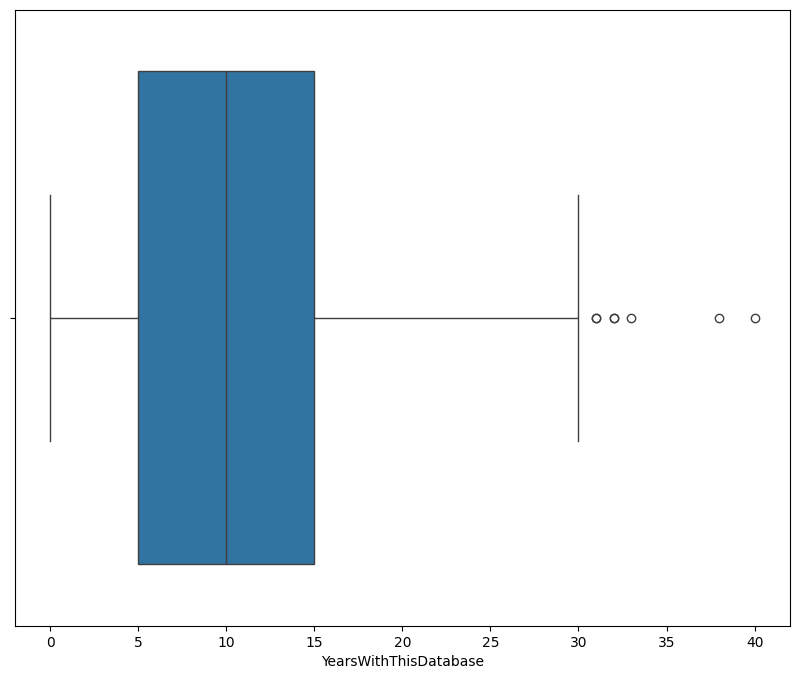

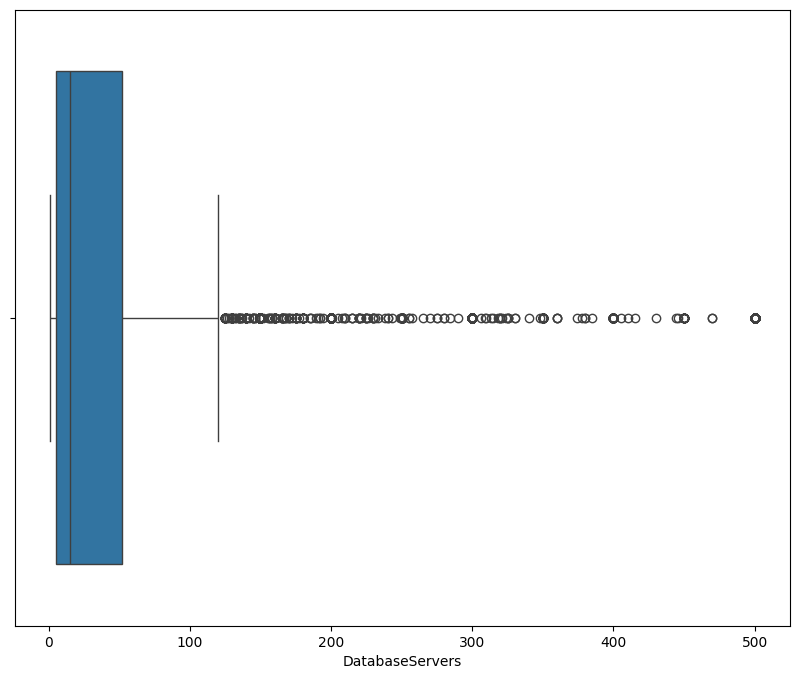

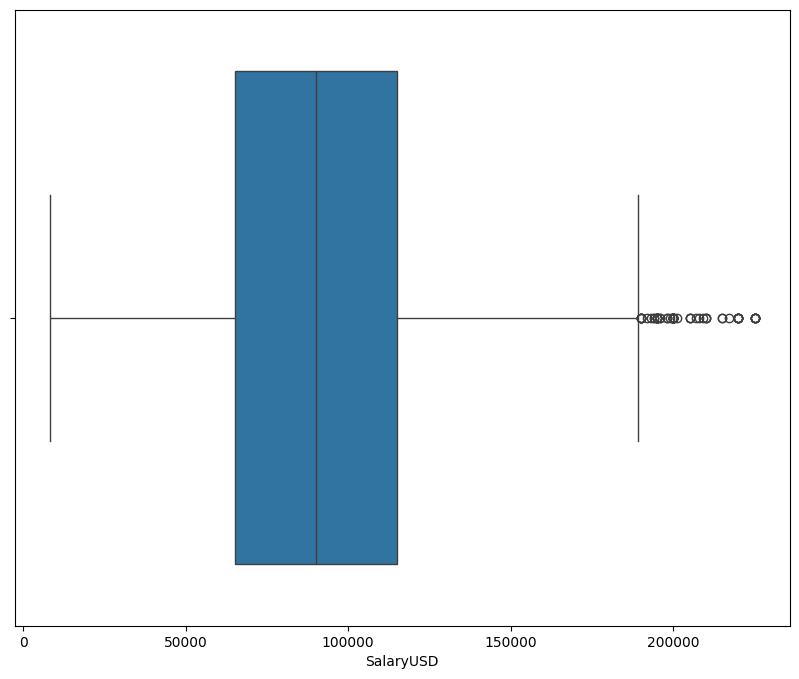

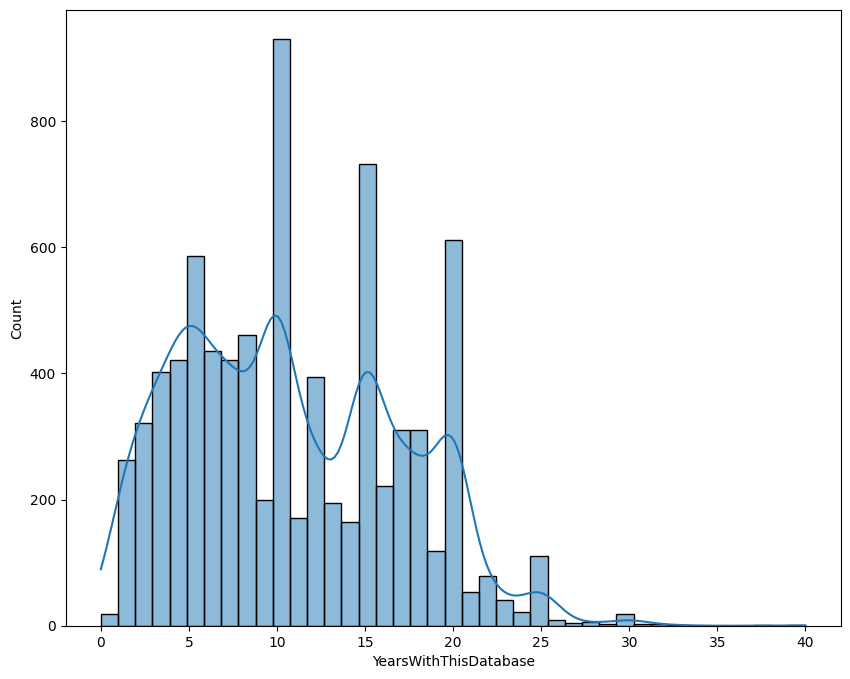

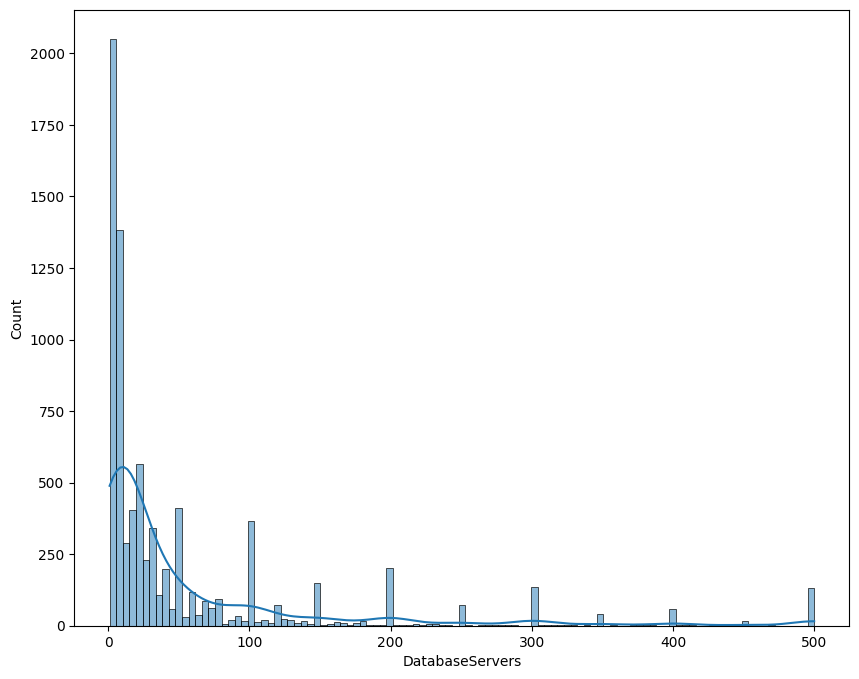

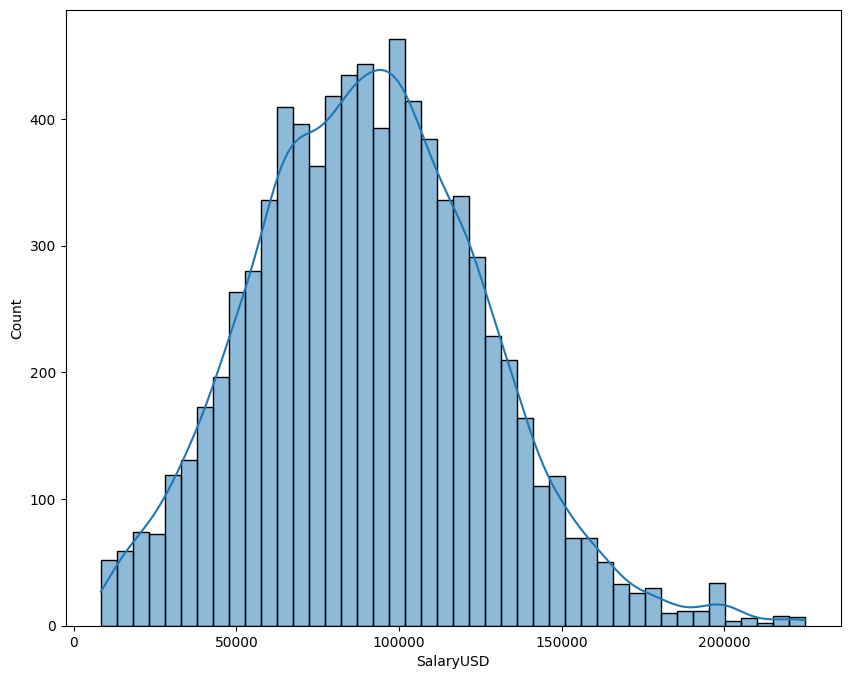

In [145]:
# A variavel de DatabaseServers representa quantas base de dados o trabalhador controla, mas realizando algumas pesquisas, valores tão extremos como 10000, 2000 databases são irreais
# e acreditamos serem erros de digitação. Por isso, realizamos uma winsorização para remover um percentual que se encontrasse em determinado quantil que definimos como limite,
#  de modo a tentar preservar a robustez do modelo.
# achamos preferivel deixar esse limiar de 0.95 pois é o tradeoff entre perda de dados e outliers muito fortes que atrapalhariam a performance do modelo.
df1 = df.select_dtypes(include= numeric_types)
for col in df1.columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(data=df, x=col)
    plt.show()

df2 = df.select_dtypes(include= numeric_types)
for col in df1.columns:
    plt.figure(figsize=(10,8))
    sns.histplot(data=df, x=col, kde= True)
    plt.show()

Observando a distribuição da variavél salary, é possível identificar que agora ela é mais concentrada e segue uma distribuição mais proxima da normal, mas possui uma alta assimetria a direita (skewed à direita)


<Axes: xlabel='SalaryUSD_log', ylabel='Count'>

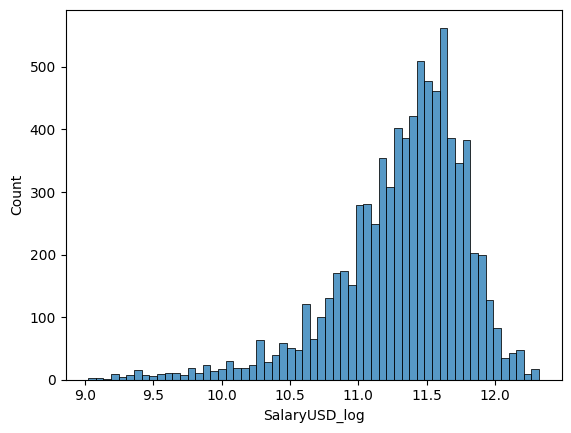

In [146]:

import numpy as np
df['SalaryUSD_log'] = np.log1p(df['SalaryUSD'])
df['DB_log'] = np.log1p(df['DatabaseServers'])
sns.histplot(data= df, x = 'SalaryUSD_log')

<Axes: xlabel='YearsWithThisDatabase', ylabel='Count'>

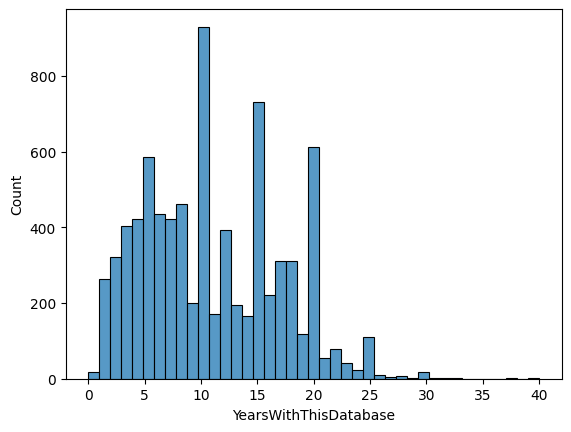

In [147]:
sns.histplot(data= df, x = 'YearsWithThisDatabase')

<Axes: xlabel='DB_log', ylabel='Count'>

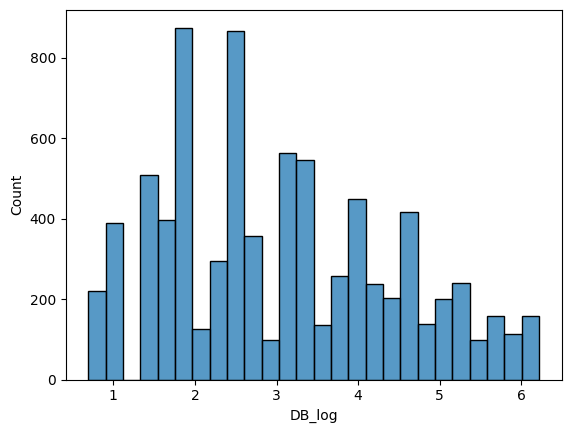

In [148]:
sns.histplot(data= df, x = 'DB_log')

In [149]:
from scipy.stats import skew, kurtosis

num_vars = ['DatabaseServers', 'YearsWithThisDatabase', 'SalaryUSD', 'SalaryUSD_log', 'DB_log']
for var in num_vars:
    print(f'{var}:')
    print(f'  Assimetria (Skewness): {skew(df[var].dropna()):.2f}')
    print(f'  Curtose: {kurtosis(df[var].dropna()):.2f}\n')


DatabaseServers:
  Assimetria (Skewness): 2.84
  Curtose: 8.38

YearsWithThisDatabase:
  Assimetria (Skewness): 0.38
  Curtose: -0.60

SalaryUSD:
  Assimetria (Skewness): 0.31
  Curtose: 0.21

SalaryUSD_log:
  Assimetria (Skewness): -1.24
  Curtose: 2.49

DB_log:
  Assimetria (Skewness): 0.41
  Curtose: -0.75



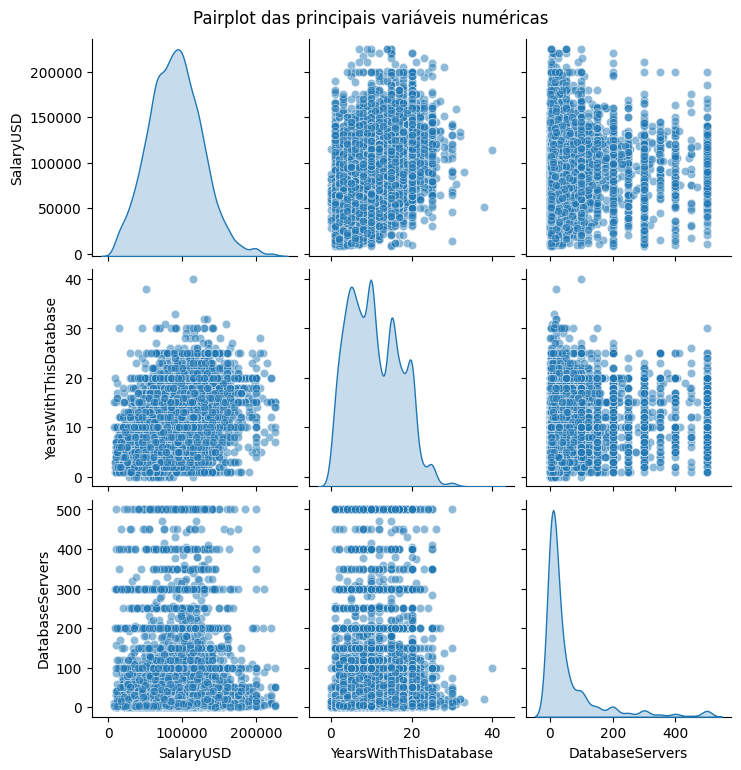

In [150]:
num_cols = ['SalaryUSD', 'YearsWithThisDatabase', 'DatabaseServers'] 
sns.pairplot(df[num_cols], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot das principais variáveis numéricas', y=1.02)
plt.show()

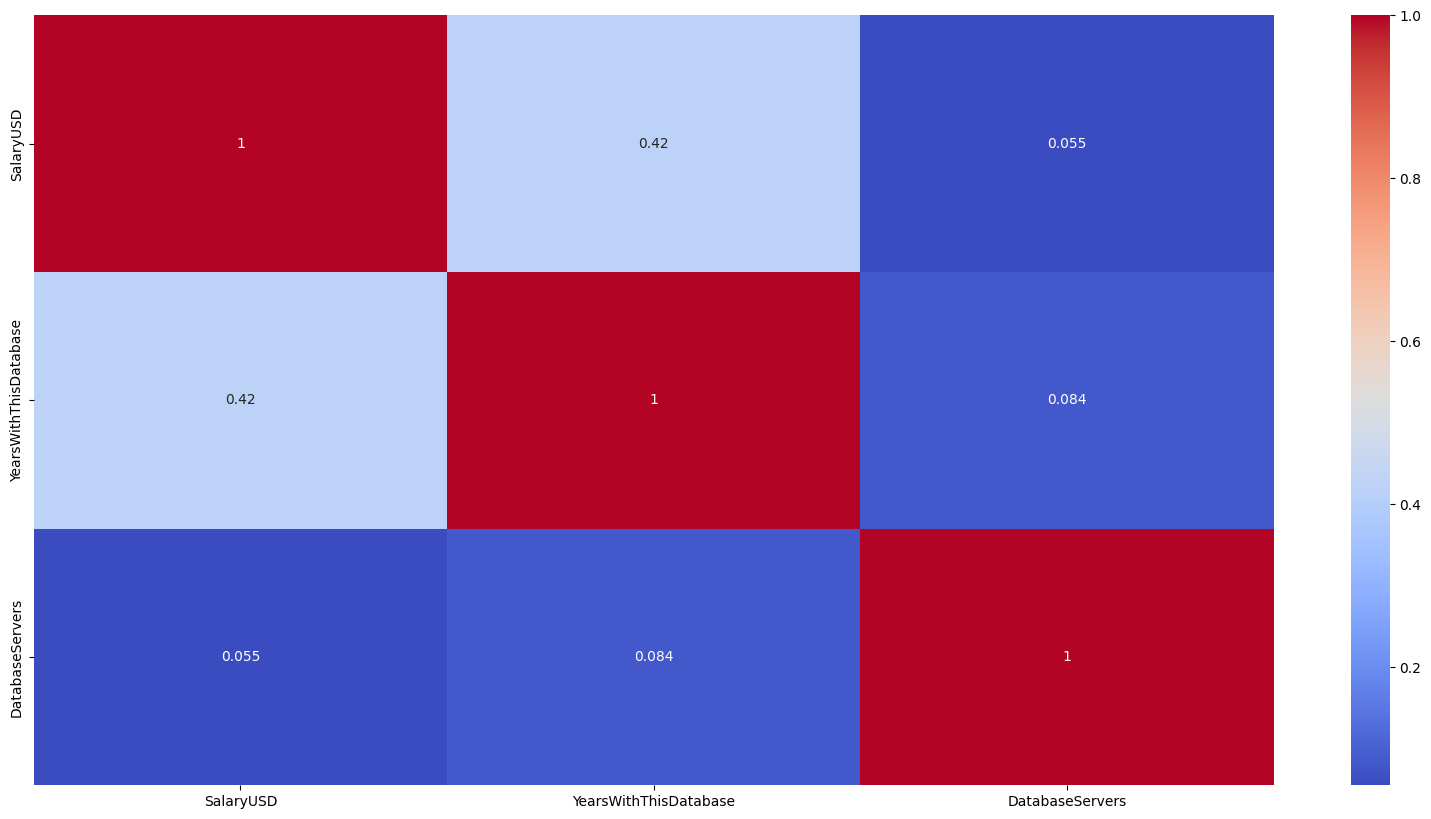

In [151]:
cols = ['SalaryUSD', 'YearsWithThisDatabase', 'DatabaseServers']
df1 = df[cols]
plt.figure(figsize=(20,10))
sns.heatmap(data=df1.corr(), annot= True, cmap = 'coolwarm')
plt.show()

A variável DatabaseServers, originalmente numérica discreta (quantidade de servidores de banco de dados utilizados), foi transformada em faixas categóricas (intervalos) para representar grupos de tamanho semelhante.

Definição dos intervalos:

Foram criados limites (bins) para agrupar os valores em cinco faixas:

0–5, 6–15, 16–30, 31–50, e Mais de 50.

Isso permite capturar padrões não lineares na relação entre o número de servidores e o salário.

Criação de categorias e dummies:

A função pd.cut() transformou os valores numéricos em categorias.

Em seguida, pd.get_dummies() criou variáveis indicadoras (dummies) para cada faixa, permitindo o uso da variável em modelos estatísticos.

Foi aplicado drop_first=True para evitar multicolinearidade (uma categoria é referência).

Conversão e limpeza:

As novas colunas dummies foram unidas ao DataFrame original,

A coluna categórica intermediária (DatabaseServers_interval) foi removida,

E as dummies foram convertidas para tipo inteiro (0/1).

In [152]:
bins = [ -1, 5, 15, 30, 50, float('inf') ]

# Nomes para as categorias
labels = ['0-5', '6-15', '16-30', '31-50', 'Mais de 50']

# Criando a nova coluna categórica com intervalos
df['DatabaseServers_interval'] = pd.cut(df['DatabaseServers'], bins=bins, labels=labels)

df['DatabaseServers_interval']
dummies = pd.get_dummies(df['DatabaseServers_interval'], prefix='DBServers', drop_first=True)

# Juntar as dummies no DataFrame original
df = pd.concat([df, dummies], axis=1)   

df = df.drop(columns=['DatabaseServers_interval'])

df

cols = ['DBServers_6-15','DBServers_16-30','DBServers_31-50','DBServers_Mais de 50']

df[cols] = df[cols].astype(int)

In [153]:
df = df.drop(columns='DatabaseServers')


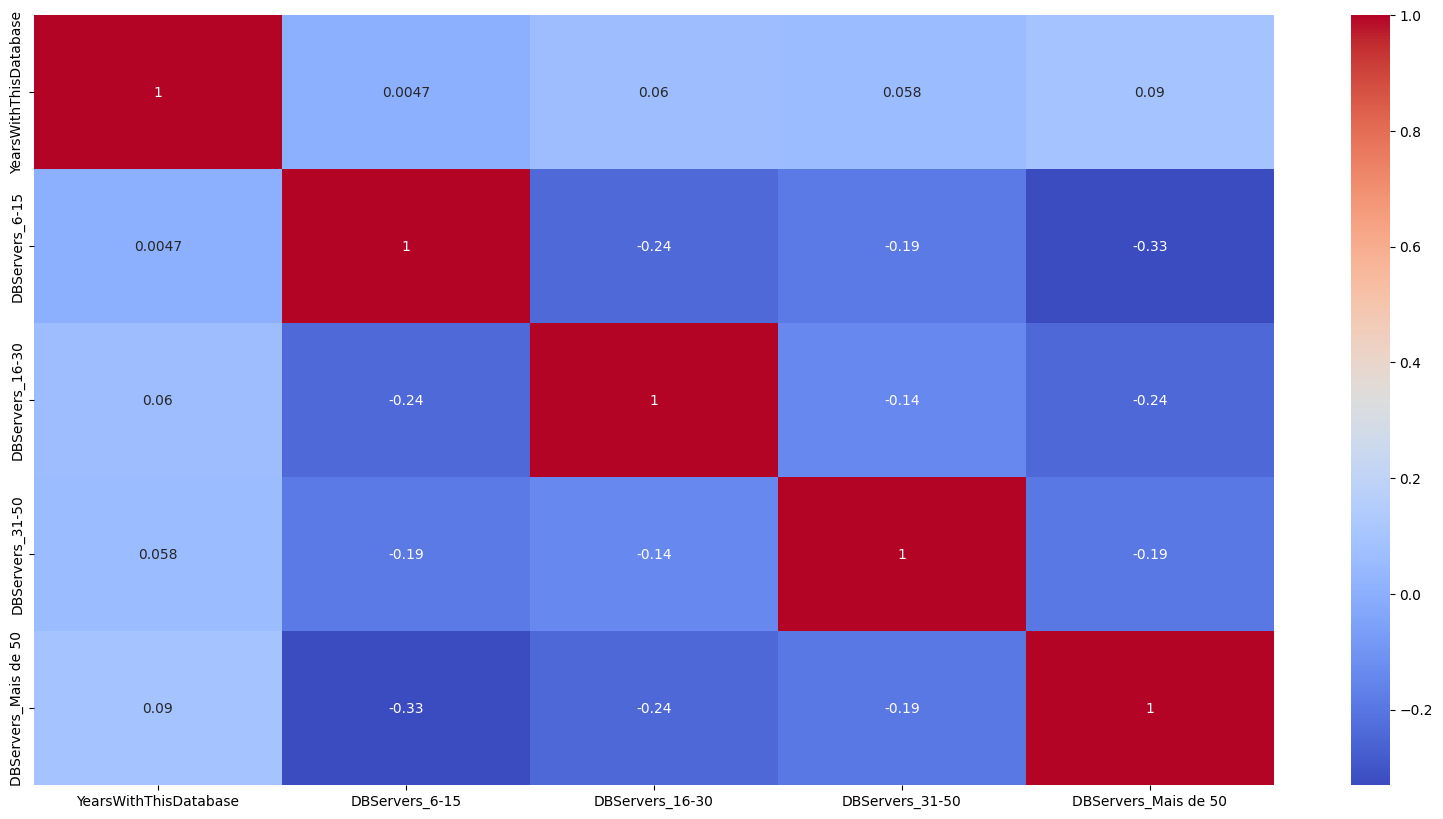

In [154]:
df1 = df.select_dtypes(int, float)
plt.figure(figsize=(20,10))
sns.heatmap(data=df1.corr(), annot= True, cmap = 'coolwarm')
plt.show()

### Variáveis categóricas: análises e transformações

In [155]:
df['Country'].value_counts()

Country
United States     5361
United Kingdom     749
Canada             290
Australia          204
Germany            117
                  ... 
Bermuda              1
Paraguay             1
Vietnam              1
Bolivia              1
Albania              1
Name: count, Length: 87, dtype: int64

In [156]:
# Definimos um limiar de frenquencia, para agrupar países que aparecem em poucas linhas em comparação aos demais.
limiar = 30

# Contagem dos países
contagem = df['Country'].value_counts()

# Lista dos países que são frequentes (acima do limiar)
pais_frequentes = contagem[contagem >= limiar].index

# Substituir países raros por "Outros"
df['Country_agrupado'] = df['Country'].apply(lambda x: x if x in pais_frequentes else 'Outros')

# Agora pode criar dummies com essa nova coluna
dummies = pd.get_dummies(df['Country_agrupado'], prefix='Country', drop_first=True)

# Concatenar e remover coluna original
df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=['Country', 'Country_agrupado'])

df

,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,ManageStaff,PopulationOfLargestCityWithin20Miles,Gender,SalaryUSD,SalaryUSD_log,DB_log,DBServers_6-15,...,Country_Outros,Country_Poland,Country_Romania,Country_Russia,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,Country_United Kingdom,Country_United States
0,Microsoft SQL Server,15,Full time employee,No,20K-99K (large town),Male,115000.0,11.652696,6.216606,0,...,False,False,False,False,False,False,False,False,False,True
1,Other,6,Full time employee,No,1M+ (metropolis),Male,100000.0,11.512935,0.693147,0,...,False,False,False,False,False,False,False,False,False,True
2,Microsoft SQL Server,2,Full time employee,Yes,1M+ (metropolis),Male,100000.0,11.512935,0.693147,0,...,False,False,False,False,False,True,False,False,False,False
3,Microsoft SQL Server,3,Full time employee,No,1M+ (metropolis),Male,70000.0,11.156265,1.386294,0,...,False,False,False,False,False,False,False,False,False,True
4,Oracle,30,Full time employee,No,100K-299K (city),Male,110000.0,11.608245,3.828641,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,No,Not Asked,Not Asked,35000.0,10.463132,3.433987,0,...,False,False,False,False,False,False,False,False,False,False
8623,Microsoft SQL Server,6,Full time employee,No,Not Asked,Not Asked,56000.0,10.933125,6.216606,0,...,False,False,False,False,False,False,False,False,True,False
8624,Microsoft SQL Server,5,Full time employee,Yes,Not Asked,Not Asked,95000.0,11.461643,4.615121,0,...,False,False,False,False,False,False,False,False,False,False
8625,Microsoft SQL Server,15,Full time employee,No,Not Asked,Not Asked,61515.0,11.027053,3.713572,0,...,False,False,False,False,False,False,False,False,True,False


In [157]:
pais_dummies = [
       'Country_Canada', 'Country_Denmark',
       'Country_Germany', 'Country_India', 'Country_Ireland', 'Country_Italy',
       'Country_Netherlands', 'Country_New Zealand', 'Country_Outros',
       'Country_Poland', 'Country_Romania',
       'Country_South Africa', 'Country_Sweden',
       'Country_Switzerland', 'Country_United Kingdom',
       'Country_United States'
]

df[pais_dummies] = df[pais_dummies].astype(int)

df = df.drop(columns = ['Gender'])
df

,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,ManageStaff,PopulationOfLargestCityWithin20Miles,SalaryUSD,SalaryUSD_log,DB_log,DBServers_6-15,DBServers_16-30,...,Country_Outros,Country_Poland,Country_Romania,Country_Russia,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,Country_United Kingdom,Country_United States
0,Microsoft SQL Server,15,Full time employee,No,20K-99K (large town),115000.0,11.652696,6.216606,0,0,...,0,0,0,False,0,False,0,0,0,1
1,Other,6,Full time employee,No,1M+ (metropolis),100000.0,11.512935,0.693147,0,0,...,0,0,0,False,0,False,0,0,0,1
2,Microsoft SQL Server,2,Full time employee,Yes,1M+ (metropolis),100000.0,11.512935,0.693147,0,0,...,0,0,0,False,0,True,0,0,0,0
3,Microsoft SQL Server,3,Full time employee,No,1M+ (metropolis),70000.0,11.156265,1.386294,0,0,...,0,0,0,False,0,False,0,0,0,1
4,Oracle,30,Full time employee,No,100K-299K (city),110000.0,11.608245,3.828641,0,0,...,0,0,0,False,0,False,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,No,Not Asked,35000.0,10.463132,3.433987,0,1,...,0,0,0,False,0,False,0,0,0,0
8623,Microsoft SQL Server,6,Full time employee,No,Not Asked,56000.0,10.933125,6.216606,0,0,...,0,0,0,False,0,False,0,0,1,0
8624,Microsoft SQL Server,5,Full time employee,Yes,Not Asked,95000.0,11.461643,4.615121,0,0,...,0,0,0,False,0,False,0,0,0,0
8625,Microsoft SQL Server,15,Full time employee,No,Not Asked,61515.0,11.027053,3.713572,0,0,...,0,0,0,False,0,False,0,0,1,0


 Mesmo contendo muitos valores com not asked, optamos por fazer um one hot encoding ordinal: cidades com maiores populações teriam maior peso na hora de prever a target salário


In [158]:
df['PopulationOfLargestCityWithin20Miles'].value_counts()


PopulationOfLargestCityWithin20Miles
Not Asked               5628
1M+ (metropolis)         912
300K-1M (large city)     731
100K-299K (city)         494
20K-99K (large town)     216
<= 20,000 (town)          61
Name: count, dtype: int64

In [159]:
ord_map = {
    'Not Asked': 0,
    '<= 20,000 (town)': 1,
    '20K-99K (large town)': 2,
    '100K-299K (city)': 3,
    '300K-1M (large city)': 4,
    '1M+ (metropolis)': 5
}

df['PopulationEncoded'] = df['PopulationOfLargestCityWithin20Miles'].map(ord_map)
df = df.drop(columns='PopulationOfLargestCityWithin20Miles')

In [160]:
df['ManageStaff'] = df['ManageStaff'].replace({'Yes': 1, 'No': 0})
df

C:\Users\Guto\AppData\Local\Temp\ipykernel_24128\279655947.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ManageStaff'] = df['ManageStaff'].replace({'Yes': 1, 'No': 0})


,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,ManageStaff,SalaryUSD,SalaryUSD_log,DB_log,DBServers_6-15,DBServers_16-30,DBServers_31-50,...,Country_Poland,Country_Romania,Country_Russia,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,Country_United Kingdom,Country_United States,PopulationEncoded
0,Microsoft SQL Server,15,Full time employee,0,115000.0,11.652696,6.216606,0,0,0,...,0,0,False,0,False,0,0,0,1,2
1,Other,6,Full time employee,0,100000.0,11.512935,0.693147,0,0,0,...,0,0,False,0,False,0,0,0,1,5
2,Microsoft SQL Server,2,Full time employee,1,100000.0,11.512935,0.693147,0,0,0,...,0,0,False,0,True,0,0,0,0,5
3,Microsoft SQL Server,3,Full time employee,0,70000.0,11.156265,1.386294,0,0,0,...,0,0,False,0,False,0,0,0,1,5
4,Oracle,30,Full time employee,0,110000.0,11.608245,3.828641,0,0,1,...,0,0,False,0,False,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,0,35000.0,10.463132,3.433987,0,1,0,...,0,0,False,0,False,0,0,0,0,0
8623,Microsoft SQL Server,6,Full time employee,0,56000.0,10.933125,6.216606,0,0,0,...,0,0,False,0,False,0,0,1,0,0
8624,Microsoft SQL Server,5,Full time employee,1,95000.0,11.461643,4.615121,0,0,0,...,0,0,False,0,False,0,0,0,0,0
8625,Microsoft SQL Server,15,Full time employee,0,61515.0,11.027053,3.713572,0,0,1,...,0,0,False,0,False,0,0,1,0,0


In [161]:
df['EmploymentStatus'].value_counts()

EmploymentStatus
Full time employee                                                   7169
Full time employee of a consulting/contracting company                569
Independent consultant, contractor, freelancer,  or company owner     190
Independent or freelancer or company owner                             90
Part time                                                              24
Name: count, dtype: int64

In [162]:
df['EmploymentStatus_agrupado'] = df['EmploymentStatus'].replace({
    'Independent consultant, contractor, freelancer,  or company owner': 'Independent/Freelancer',
    'Independent or freelancer or company owner': 'Independent/Freelancer'
})
dummies_emp = pd.get_dummies(df['EmploymentStatus_agrupado'], prefix='Employment', drop_first=True)
df = pd.concat([df, dummies_emp], axis=1)
df = df.drop(columns=['EmploymentStatus', 'EmploymentStatus_agrupado'])

cols=['Employment_Full time employee of a consulting/contracting company','Employment_Independent/Freelancer','Employment_Part time']
df[cols] = df[cols].astype(int)

In [163]:
df.columns

Index(['PrimaryDatabase', 'YearsWithThisDatabase', 'ManageStaff', 'SalaryUSD',
       'SalaryUSD_log', 'DB_log', 'DBServers_6-15', 'DBServers_16-30',
       'DBServers_31-50', 'DBServers_Mais de 50', 'Country_Belgium',
       'Country_Brazil', 'Country_Canada', 'Country_Denmark', 'Country_France',
       'Country_Germany', 'Country_India', 'Country_Ireland', 'Country_Italy',
       'Country_Netherlands', 'Country_New Zealand', 'Country_Outros',
       'Country_Poland', 'Country_Romania', 'Country_Russia',
       'Country_South Africa', 'Country_Spain', 'Country_Sweden',
       'Country_Switzerland', 'Country_United Kingdom',
       'Country_United States', 'PopulationEncoded',
       'Employment_Full time employee of a consulting/contracting company',
       'Employment_Independent/Freelancer', 'Employment_Part time'],
      dtype='object')

In [164]:
df['PrimaryDatabase'].value_counts()

PrimaryDatabase
Microsoft SQL Server       7479
Oracle                      266
Other                        66
PostgreSQL                   64
MySQL/MariaDB                42
Azure SQL DB                 36
DB2                          21
Amazon RDS (any flavor)      17
Microsoft Access             15
SAP                          11
MongoDB                       8
Teradata                      8
SQLite                        5
Cassandra                     2
Elasticsearch                 2
Name: count, dtype: int64

In [165]:
db_agrupado = df['PrimaryDatabase'].copy()

frequentes = ['Microsoft SQL Server', 'Oracle', 'PostgreSQL', 'MySQL/MariaDB', 'Azure SQL DB']
db_agrupado = db_agrupado.apply(lambda x: x if x in frequentes else 'OtherDB')

dummies_db = pd.get_dummies(db_agrupado, prefix='DB', drop_first=True)

df = pd.concat([df, dummies_db], axis=1)

df = df.drop(columns=['PrimaryDatabase'])

col = ['DB_Microsoft SQL Server',	'DB_MySQL/MariaDB',	'DB_Oracle',	'DB_OtherDB',	'DB_PostgreSQL']
df[col] = df[col].astype(int)

In [166]:
df

,YearsWithThisDatabase,ManageStaff,SalaryUSD,SalaryUSD_log,DB_log,DBServers_6-15,DBServers_16-30,DBServers_31-50,DBServers_Mais de 50,Country_Belgium,...,Country_United States,PopulationEncoded,Employment_Full time employee of a consulting/contracting company,Employment_Independent/Freelancer,Employment_Part time,DB_Microsoft SQL Server,DB_MySQL/MariaDB,DB_Oracle,DB_OtherDB,DB_PostgreSQL
0,15,0,115000.0,11.652696,6.216606,0,0,0,1,False,...,1,2,0,0,0,1,0,0,0,0
1,6,0,100000.0,11.512935,0.693147,0,0,0,0,False,...,1,5,0,0,0,0,0,0,1,0
2,2,1,100000.0,11.512935,0.693147,0,0,0,0,False,...,0,5,0,0,0,1,0,0,0,0
3,3,0,70000.0,11.156265,1.386294,0,0,0,0,False,...,1,5,0,0,0,1,0,0,0,0
4,30,0,110000.0,11.608245,3.828641,0,0,1,0,False,...,1,3,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,10,0,35000.0,10.463132,3.433987,0,1,0,0,False,...,0,0,1,0,0,1,0,0,0,0
8623,6,0,56000.0,10.933125,6.216606,0,0,0,1,False,...,0,0,0,0,0,1,0,0,0,0
8624,5,1,95000.0,11.461643,4.615121,0,0,0,1,False,...,0,0,0,0,0,1,0,0,0,0
8625,15,0,61515.0,11.027053,3.713572,0,0,1,0,False,...,0,0,0,0,0,1,0,0,0,0


In [167]:
df.value_counts()

YearsWithThisDatabase  ManageStaff  SalaryUSD  SalaryUSD_log  DB_log    DBServers_6-15  DBServers_16-30  DBServers_31-50  DBServers_Mais de 50  Country_Belgium  Country_Brazil  Country_Canada  Country_Denmark  Country_France  Country_Germany  Country_India  Country_Ireland  Country_Italy  Country_Netherlands  Country_New Zealand  Country_Outros  Country_Poland  Country_Romania  Country_Russia  Country_South Africa  Country_Spain  Country_Sweden  Country_Switzerland  Country_United Kingdom  Country_United States  PopulationEncoded  Employment_Full time employee of a consulting/contracting company  Employment_Independent/Freelancer  Employment_Part time  DB_Microsoft SQL Server  DB_MySQL/MariaDB  DB_Oracle  DB_OtherDB  DB_PostgreSQL
20                     0            120000.0   11.695255      1.609438  0               0                0                0                     False            False           0               0                False           0                0              0

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [169]:
df.columns

Index(['YearsWithThisDatabase', 'ManageStaff', 'SalaryUSD', 'SalaryUSD_log',
       'DB_log', 'DBServers_6-15', 'DBServers_16-30', 'DBServers_31-50',
       'DBServers_Mais de 50', 'Country_Belgium', 'Country_Brazil',
       'Country_Canada', 'Country_Denmark', 'Country_France',
       'Country_Germany', 'Country_India', 'Country_Ireland', 'Country_Italy',
       'Country_Netherlands', 'Country_New Zealand', 'Country_Outros',
       'Country_Poland', 'Country_Romania', 'Country_Russia',
       'Country_South Africa', 'Country_Spain', 'Country_Sweden',
       'Country_Switzerland', 'Country_United Kingdom',
       'Country_United States', 'PopulationEncoded',
       'Employment_Full time employee of a consulting/contracting company',
       'Employment_Independent/Freelancer', 'Employment_Part time',
       'DB_Microsoft SQL Server', 'DB_MySQL/MariaDB', 'DB_Oracle',
       'DB_OtherDB', 'DB_PostgreSQL'],
      dtype='object')

In [170]:
# Vamos dividir os anos de experiência em faixas de idade.
bins_exp = [-1, 5, 10, 15, 20, 41]
labels_exp = ['0-5 anos', '6-10 anos', '11-15 anos', '16-20 anos', '20+ anos']

df['Experiencia_Faixa'] = pd.cut(df['YearsWithThisDatabase'], bins=bins_exp, labels=labels_exp)

dummies_exp = pd.get_dummies(df['Experiencia_Faixa'], prefix='Exp', drop_first=True).astype(int)

df = pd.concat([df, dummies_exp], axis=1)

df = df.drop(columns=['YearsWithThisDatabase', 'Experiencia_Faixa'])

print("--- 'YearsWithThisDatabase' substituída por faixas (dummies) ---")

df

--- 'YearsWithThisDatabase' substituída por faixas (dummies) ---


,ManageStaff,SalaryUSD,SalaryUSD_log,DB_log,DBServers_6-15,DBServers_16-30,DBServers_31-50,DBServers_Mais de 50,Country_Belgium,Country_Brazil,...,Employment_Part time,DB_Microsoft SQL Server,DB_MySQL/MariaDB,DB_Oracle,DB_OtherDB,DB_PostgreSQL,Exp_6-10 anos,Exp_11-15 anos,Exp_16-20 anos,Exp_20+ anos
0,0,115000.0,11.652696,6.216606,0,0,0,1,False,False,...,0,1,0,0,0,0,0,1,0,0
1,0,100000.0,11.512935,0.693147,0,0,0,0,False,False,...,0,0,0,0,1,0,1,0,0,0
2,1,100000.0,11.512935,0.693147,0,0,0,0,False,False,...,0,1,0,0,0,0,0,0,0,0
3,0,70000.0,11.156265,1.386294,0,0,0,0,False,False,...,0,1,0,0,0,0,0,0,0,0
4,0,110000.0,11.608245,3.828641,0,0,1,0,False,False,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,0,35000.0,10.463132,3.433987,0,1,0,0,False,False,...,0,1,0,0,0,0,1,0,0,0
8623,0,56000.0,10.933125,6.216606,0,0,0,1,False,False,...,0,1,0,0,0,0,1,0,0,0
8624,1,95000.0,11.461643,4.615121,0,0,0,1,False,False,...,0,1,0,0,0,0,0,0,0,0
8625,0,61515.0,11.027053,3.713572,0,0,1,0,False,False,...,0,1,0,0,0,0,0,1,0,0


In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

try:
    y = df['SalaryUSD_log']
    X = df.drop(columns = ['SalaryUSD', 'SalaryUSD_log']).astype(float)
except NameError:
    print("Erro: O dataframe 'df' não foi encontrado.")
    print("Certifique-se de que o notebook rodou as células de tratamento (incluindo o clipping).")
except KeyError:
    print("Erro: A coluna 'SalaryUSD' não foi encontrada no 'df'.")

X_stepwise = X.copy()

p_valor_limite = 0.05
vars_removidas = []

print("Iniciando Stepwise (Backward Elimination)")

while True:
    X_sm = sm.add_constant(X_stepwise)
    
    model = sm.OLS(y, X_sm).fit()
    
    p_values = model.pvalues
    
    p_max = p_values.drop('const').max()
    p_max_var = p_values.drop('const').idxmax()
    
    if p_max <= p_valor_limite:
        print("\n- Seleção de Variáveis Concluída -")
        print("Todas as variáveis restantes são significativas.")
        break
    else:
        print(f"Removendo variável: {p_max_var} (P-valor: {p_max:.4f})")
        X_stepwise = X_stepwise.drop(columns=[p_max_var])
        vars_removidas.append(p_max_var)
        
print("\n- Resultado Final (Pós-Stepwise) -")
print(f"Variáveis removidas: {vars_removidas}")
print(model.summary())

print(f"\n--- RMSE (no dataset de treino): {np.sqrt(model.mse_resid):.4f} ---")


Iniciando Stepwise (Backward Elimination)
Removendo variável: DB_PostgreSQL (P-valor: 0.8657)
Removendo variável: DBServers_Mais de 50 (P-valor: 0.5224)
Removendo variável: Country_Denmark (P-valor: 0.4181)
Removendo variável: Country_Ireland (P-valor: 0.1293)
Removendo variável: DB_OtherDB (P-valor: 0.1205)

- Seleção de Variáveis Concluída -
Todas as variáveis restantes são significativas.

- Resultado Final (Pós-Stepwise) -
Variáveis removidas: ['DB_PostgreSQL', 'DBServers_Mais de 50', 'Country_Denmark', 'Country_Ireland', 'DB_OtherDB']
                            OLS Regression Results                            
Dep. Variable:          SalaryUSD_log   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     372.7
Date:                Sun, 26 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:09:28   Log-Likelihood:    

In [172]:
df_anova = df[X_stepwise.columns.tolist() + ['SalaryUSD_log']].copy()

df_anova.columns = df_anova.columns.str.replace('[^0-9a-zA-Z_]', '_', regex=True)

vars_final = '+'.join(df_anova.columns.drop('SalaryUSD_log'))
formula = f'SalaryUSD_log ~ {vars_final}'

import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

model_formula = smf.ols(formula=formula, data=df_anova).fit()

anova_results = anova_lm(model_formula, typ=2)
print(anova_results.round(4))


                                                      sum_sq      df  \
Country_Belgium                                       4.3834     1.0   
Country_Brazil                                       33.3855     1.0   
Country_France                                        5.8081     1.0   
Country_Russia                                       34.2804     1.0   
Country_Spain                                        15.7504     1.0   
ManageStaff                                          14.0613     1.0   
DB_log                                                7.8443     1.0   
DBServers_6_15                                        0.5717     1.0   
DBServers_16_30                                       0.3829     1.0   
DBServers_31_50                                       0.7386     1.0   
Country_Canada                                        4.3018     1.0   
Country_Germany                                       3.2911     1.0   
Country_India                                       130.1050    